In [0]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [42]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [43]:
print(y_train.shape)
y_train

(50000, 1)


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
trans = ["airplane", "automobile",
         "bird", "cat",
         "deer", "dog",
         "frog", "horse",
         "ship", "truck"]

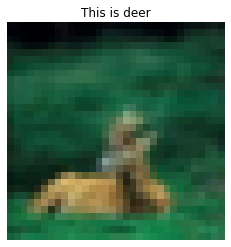

In [45]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
idx = random.randint(0, 49999)
ans = y_train[idx][0]
plt.title("This is {}".format(trans[ans]))
plt.axis("off")
plt.imshow(x_train[idx])

In [46]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
model = Sequential()
# CNN
# 3 * 3 * 3(1 filter) * 64 + 64(bias) = 1792
model.add(Conv2D(64, 3,
                 activation="relu",
                 padding="same",
                 input_shape=(32, 32, 3)))
model.add(MaxPooling2D())
# 3 * 3 * 64(1 filter) * 128 + 128(bias) = 73856
model.add(Conv2D(128, 3,
                 activation="relu",
                 padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(256, 3,
                 activation="relu",
                 padding="same"))
model.add(MaxPooling2D())
# MLP
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)             

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [0]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [49]:
model.fit(x_train_norm, y_train,
          batch_size=200,
          epochs=10,
          validation_split=0.1,
          verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 7s - loss: 1.5777 - acc: 0.4264 - val_loss: 1.2117 - val_acc: 0.5718
Epoch 2/10
 - 6s - loss: 1.1152 - acc: 0.6063 - val_loss: 0.9834 - val_acc: 0.6606
Epoch 3/10
 - 6s - loss: 0.9088 - acc: 0.6818 - val_loss: 0.8613 - val_acc: 0.7024
Epoch 4/10
 - 6s - loss: 0.7885 - acc: 0.7265 - val_loss: 0.8082 - val_acc: 0.7232
Epoch 5/10
 - 6s - loss: 0.6782 - acc: 0.7650 - val_loss: 0.7426 - val_acc: 0.7502
Epoch 6/10
 - 6s - loss: 0.6011 - acc: 0.7888 - val_loss: 0.7364 - val_acc: 0.7530
Epoch 7/10
 - 6s - loss: 0.5173 - acc: 0.8190 - val_loss: 0.6949 - val_acc: 0.7666
Epoch 8/10
 - 6s - loss: 0.4364 - acc: 0.8479 - val_loss: 0.6814 - val_acc: 0.7772
Epoch 9/10
 - 6s - loss: 0.3660 - acc: 0.8717 - val_loss: 0.6835 - val_acc: 0.7900
Epoch 10/10
 - 6s - loss: 0.3025 - acc: 0.8938 - val_loss: 0.7555 - val_acc: 0.7674


In [50]:
model.evaluate(x_test_norm, y_test)

10000/10000 [==============================] - 1s 106us/step


[0.8113350086688995, 0.7588]

In [51]:
import pandas as pd
from sklearn.metrics import confusion_matrix

pre = model.predict_classes(x_test_norm)
i = ["{}(正確)".format(n) for n in trans]
c = ["{}(預測)".format(n) for n in trans]
percents = []
for r in confusion_matrix(y_test, pre):
    percents.append(["{}%".format(round(n/sum(r) * 100, 2)) for n in r])
pd.DataFrame(percents,
             index=i,
             columns=c)

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),78.7%,2.9%,3.8%,3.6%,1.3%,0.4%,1.0%,0.9%,5.2%,2.2%
automobile(正確),0.9%,91.0%,0.4%,1.2%,0.5%,0.6%,0.9%,0.2%,0.7%,3.6%
bird(正確),4.6%,0.6%,66.1%,5.9%,8.6%,5.2%,5.7%,2.4%,0.5%,0.4%
cat(正確),1.3%,1.5%,4.9%,62.0%,6.4%,13.0%,6.4%,2.7%,0.9%,0.9%
deer(正確),1.3%,0.4%,5.0%,6.1%,73.6%,3.7%,3.5%,5.2%,1.0%,0.2%
dog(正確),1.2%,0.2%,3.7%,17.0%,4.8%,66.4%,2.6%,3.1%,0.5%,0.5%
frog(正確),0.4%,0.7%,3.1%,4.5%,4.7%,1.6%,84.3%,0.3%,0.3%,0.1%
horse(正確),0.8%,0.3%,2.4%,4.1%,5.3%,4.9%,0.7%,81.3%,0.1%,0.1%
ship(正確),7.1%,4.3%,2.1%,2.0%,0.2%,0.7%,0.5%,0.4%,82.0%,0.7%
truck(正確),2.5%,14.9%,1.6%,2.4%,0.5%,0.8%,0.7%,1.1%,2.1%,73.4%


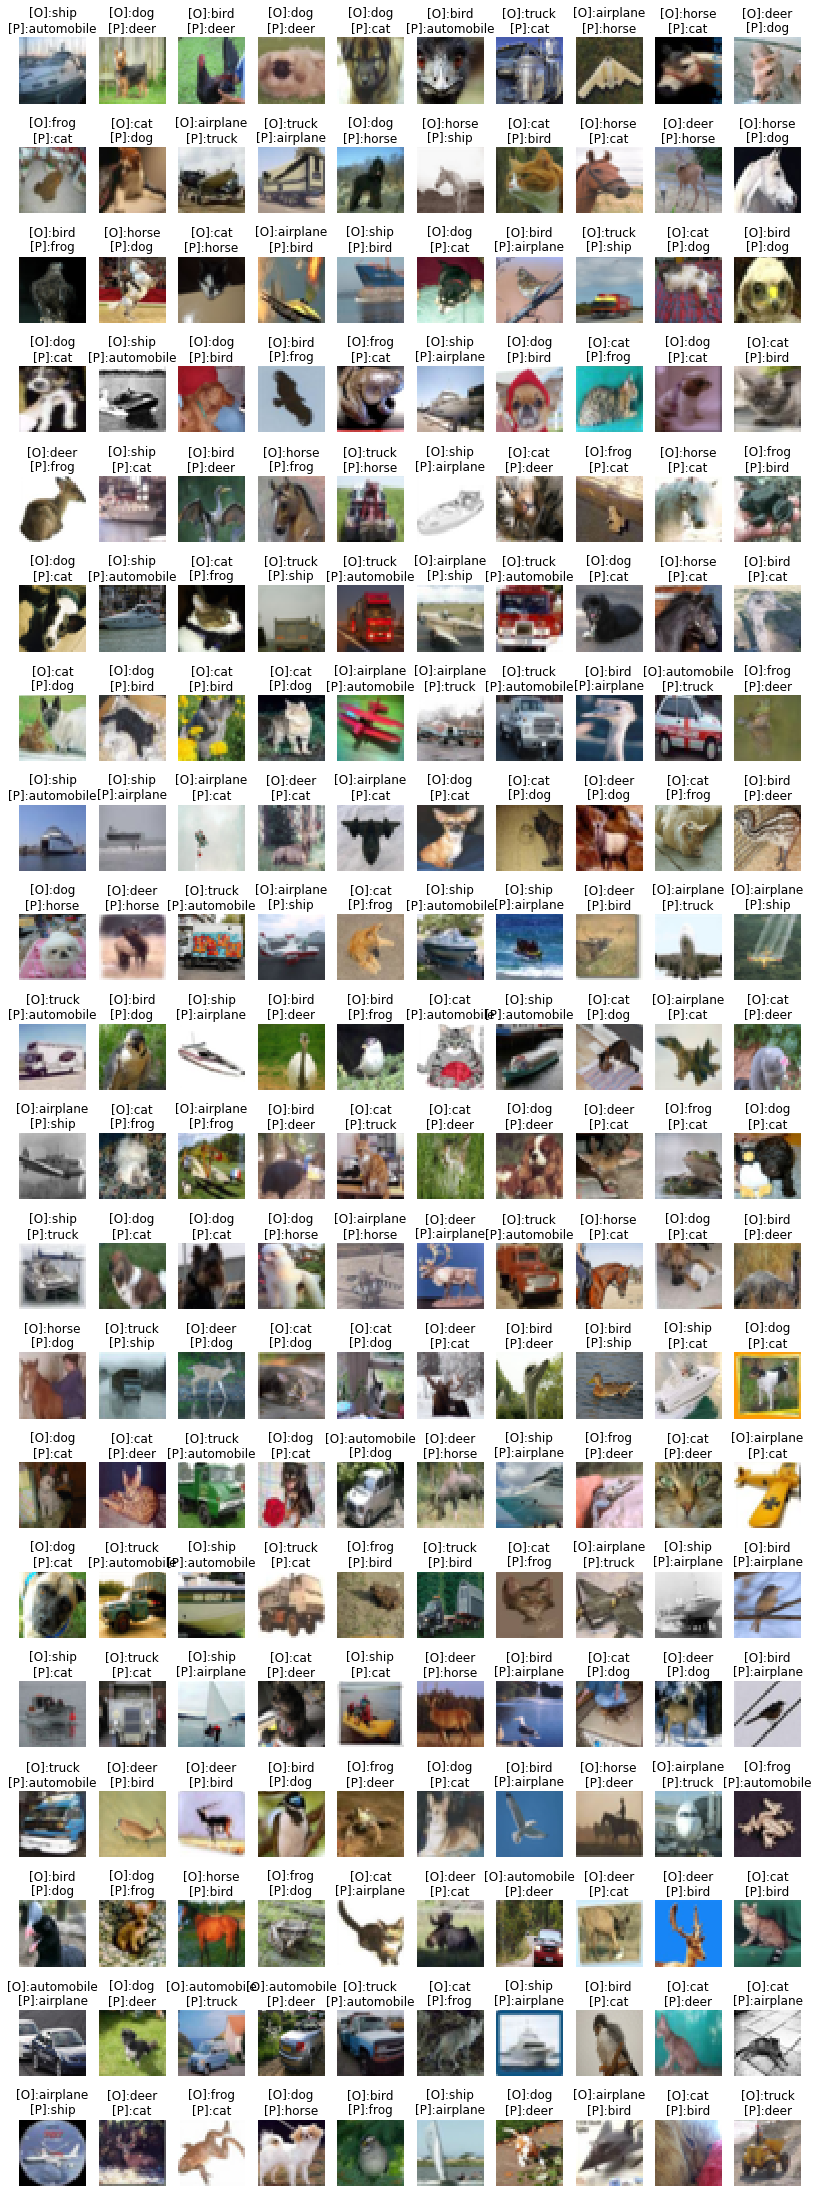

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

y_test_reshape = y_test.reshape(-1)
idx = np.nonzero(pre != y_test_reshape)[0][:200]
pre_false_img = x_test[idx]
pre_false_label = y_test_reshape[idx]
pre_false_pre = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))

z = zip(pre_false_img, pre_false_label, pre_false_pre)
# (i, (z1, z2, z3))
for i, (img, label, p) in enumerate(z):
    plt.subplot(height, width, i+1)
    plt.title("[O]:{}\n[P]:{}".format(trans[label], trans[p]))
    plt.axis("off")
    plt.imshow(img, cmap="gray")